<a href="https://colab.research.google.com/github/gaurav2506/Cyclistic/blob/main/Cyclistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Importing the files to Python
df01 = pd.read_csv("/content/drive/MyDrive/Cyclisitc/Data/202011-divvy-tripdata.csv")
df02 = pd.read_csv("/content/drive/MyDrive/Cyclisitc/Data/202012-divvy-tripdata.csv")
df03 = pd.read_csv("/content/drive/MyDrive/Cyclisitc/Data/202101-divvy-tripdata.csv")
df04 = pd.read_csv("/content/drive/MyDrive/Cyclisitc/Data/202102-divvy-tripdata.csv")
df05 = pd.read_csv("/content/drive/MyDrive/Cyclisitc/Data/202103-divvy-tripdata.csv")
df06 = pd.read_csv("/content/drive/MyDrive/Cyclisitc/Data/202104-divvy-tripdata.csv")
df07 = pd.read_csv("/content/drive/MyDrive/Cyclisitc/Data/202105-divvy-tripdata.csv")
df08 = pd.read_csv("/content/drive/MyDrive/Cyclisitc/Data/202106-divvy-tripdata.csv")
df09 = pd.read_csv("/content/drive/MyDrive/Cyclisitc/Data/202107-divvy-tripdata.csv")
df10 = pd.read_csv("/content/drive/MyDrive/Cyclisitc/Data/202108-divvy-tripdata.csv")
df11 = pd.read_csv("/content/drive/MyDrive/Cyclisitc/Data/202109-divvy-tripdata.csv")
df12 = pd.read_csv("/content/drive/MyDrive/Cyclisitc/Data/202110-divvy-tripdata.csv")

In [ ]:
#Meging those files
master_df=pd.concat([df01,df02,df03,df04,df05,df06,df07,df08,df09,df10,df11,df12])

In [ ]:
#Metadata
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5378834 entries, 0 to 631225
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 574.5+ MB


In [ ]:
#Adding new columns start and end. These columns are started_at and ended_at columns converted from Object to datetime data type.
master_df["start"] = pd.to_datetime(master_df["started_at"])
master_df["end"] = pd.to_datetime(master_df["ended_at"])

In [ ]:
#Calculating length of total rides in column ride_length by subtracting end by start
master_df["ride_length"] = master_df["end"] - master_df["start"]
master_df["ride_length"].head()

0   0 days 00:09:40
1   0 days 00:11:19
2   0 days 00:29:01
3   0 days 00:09:15
4   0 days 00:33:27
Name: ride_length, dtype: timedelta64[ns]

In [ ]:
# Splitting and extracting the date from "started_at" column
master_df["start_date"] = [i.split(" ")[0] for i in master_df["started_at"]]
# Converting start_date1 into datetime data type
master_df["start_date"] = pd.to_datetime(master_df["start_date"])
# Finding the weekday of the date
master_df['week_day'] = master_df["start_date"].apply(lambda x: x.weekday())
# Converting weekday values into weekday
dict1 = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
master_df['week_day'] = master_df['week_day'].apply(lambda y: dict1[y])

In [ ]:
# To extract year and month from start date column
master_df['year'] = pd.DatetimeIndex(master_df["start_date"]).year
master_df['month'] = pd.DatetimeIndex(master_df["start_date"]).month

In [ ]:
# To calculate euclidean distance between start and end point.
master_df["x"] = (master_df["end_lat"] - master_df["start_lat"])**2
master_df["y"] = (master_df["end_lng"] - master_df["start_lng"])**2
master_df["distance"] = (master_df["x"] + master_df["y"])**(1/2)
master_df["distance"]

0         0.005754
1         0.028824
2         0.015603
3         0.024142
4         0.000053
            ...   
631221    0.034801
631222    0.030542
631223    0.010889
631224    0.010882
631225    0.043390
Name: distance, Length: 5378834, dtype: float64

In [ ]:
master_df.ride_length.describe()

count                      5378834
mean     0 days 00:20:29.374965280
std      0 days 04:59:59.531975398
min             -21 days +19:50:02
25%                0 days 00:06:58
50%                0 days 00:12:23
75%                0 days 00:22:26
max               38 days 20:24:09
Name: ride_length, dtype: object

In [ ]:
mean_ride_length,max_ride_length=master_df.ride_length.mean(),master_df.ride_length.max()
print("Average ride length:{} (All users)\nMaximum ride length:{} (All users)".format(mean_ride_length,max_ride_length))

Average ride length:0 days 00:20:29.374965280 (All users)
Maximum ride length:38 days 20:24:09 (All users)


In [ ]:
#For members
member_stat = master_df[master_df["member_casual"] == "member"]
member_ride_length_avg,member_ride_length_max=member_stat.ride_length.mean(),member_stat.ride_length.max()
print("Average ride length:{} (Members)\nMaximum ride length:{} (Members)".format(member_ride_length_avg,member_ride_length_max))


Average ride length:0 days 00:11:01.074557553 (Members)
Maximum ride length:1 days 01:59:56 (Members)


In [ ]:
# #For casual
casual_stat = master_df[master_df["member_casual"] == "casual"]
casual_ride_length_avg,casual_ride_length_max=casual_stat.ride_length.mean(),casual_stat.ride_length.max()
print("Average ride length:{} (Casual)\nMaximum ride length:{} (Casual)".format(casual_ride_length_avg,casual_ride_length_max))

Average ride length:0 days 00:31:38.383815209 (Casual)
Maximum ride length:38 days 20:24:09 (Casual)


In [ ]:
# Most popular week day among all users --> Mode
week_day = master_df.week_day.mode()
week_day_member,week_day_casual=member_stat.week_day.mode(),casual_stat.week_day.mode()
print("\nMost popular weekday:{}\nMember:{}\nCasual:{}".format(week_day,week_day_member,week_day_casual))


Most popular weekday:0    Friday
dtype: object
Member:0    Tuesday
dtype: object
Casual:0    Friday
dtype: object


In [ ]:
weekday_user = master_df.groupby('week_day')['ride_id'].count()
weekday_user = weekday_user.sort_index()
weekday_user

week_day
Friday       973172
Monday       696199
Saturday     844689
Sunday       669649
Thursday     780238
Tuesday      711872
Wednesday    703015
Name: ride_id, dtype: int64

In [ ]:
weekday_member = master_df[master_df["member_casual"] == "member"].groupby('week_day')['ride_id'].count()

In [ ]:
weekday_casual = master_df[master_df["member_casual"] == "casual"].groupby('week_day')['ride_id'].count()

In [ ]:
# Calculate the average ride_length for users by week_day
mean_ride_length = master_df.groupby("week_day")['ride_length'].mean(numeric_only=False)

In [ ]:
# Calculate the average ride_length for members by week_day
mean_ride_length_member = master_df[master_df["member_casual"] == "member"].groupby('week_day')['ride_length'].mean(numeric_only=False)

In [ ]:
# Calculate the average ride_length for casual by week_day
mean_ride_length_casual = master_df[master_df["member_casual"] == "casual"].groupby('week_day')['ride_length'].mean(numeric_only=False)

In [ ]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5378834 entries, 0 to 631225
Data columns (total 23 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          object         
 3   ended_at            object         
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  start               datetime64[ns] 
 14  end                 datetime64[ns] 
 15  ride_length         timedelta64[ns]
 16  start_date          datetime64[ns] 
 17  week_day            object         
 18  year                int64          
 19  month               in

In [ ]:
#Extracting relevant features from data frame
cyclistic = master_df[["ride_id", "rideable_type", "ride_length", "week_day", "distance", "year", "month", "member_casual"]]


In [ ]:
#Data preview

cyclistic.head()

,ride_id,rideable_type,ride_length,week_day,distance,year,month,member_casual
0,BD0A6FF6FFF9B921,electric_bike,0 days 00:09:40,Saturday,0.005754,2020,11,casual
1,96A7A7A4BDE4F82D,electric_bike,0 days 00:11:19,Saturday,0.028824,2020,11,casual
2,C61526D06582BDC5,electric_bike,0 days 00:29:01,Saturday,0.015603,2020,11,casual
3,E533E89C32080B9E,electric_bike,0 days 00:09:15,Saturday,0.024142,2020,11,casual
4,1C9F4EF18C168C60,electric_bike,0 days 00:33:27,Saturday,0.000053,2020,11,casual


In [ ]:
# master_df.to_csv("/content/drive/MyDrive/Cyclisitc/Data/cyclistic_ready_data.csv")

In [ ]:
# cyclistic.to_csv("/content/drive/MyDrive/Cyclisitc/Data/cyclistic_final.csv")

### **Data Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Type of users in past 12 months
         member_casual
member        2908317
casual        2470517 



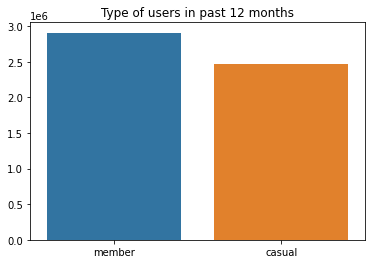

In [ ]:
#Type of users in past 12 months
member=cyclistic.member_casual.value_counts()
print("Type of users in past 12 months\n",pd.DataFrame(member),"\n")
sns.barplot(member.index,member.values).set(title="Type of users in past 12 months")
fig = plt.gcf()
size = fig.get_size_inches()*fig.dpi # size in pixels

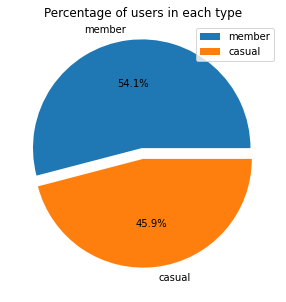

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(member.values, labels = member.index, autopct='%1.1f%%',explode = (0.1,0))
plt.title("Percentage of users in each type")
plt.legend(member.index)

In [ ]:
customer_by_year = cyclistic.groupby('year')["member_casual"].value_counts()
years = []
val = []
cby=list(customer_by_year.values)
for i,j in customer_by_year.index:
  val.append(j)
  years.append(str(i))

[Text(0.5, 1.0, 'Count of Member and Casual Riders over the years')]

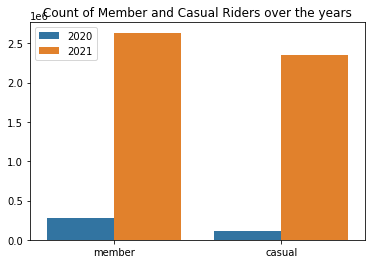

In [ ]:
sns.barplot(val,list(customer_by_year.values),hue=years).set(title="Count of Member and Casual Riders over the years")

In [ ]:
customer_by_month = cyclistic.groupby('month')['member_casual'].value_counts()
months = []
val = []
cbm = list(customer_by_month.values)
for i, j in customer_by_month.index:
  val.append(j)
  months.append(str(i))

[Text(0.5, 1.0, 'Count of Member and Casual Riders over the months')]

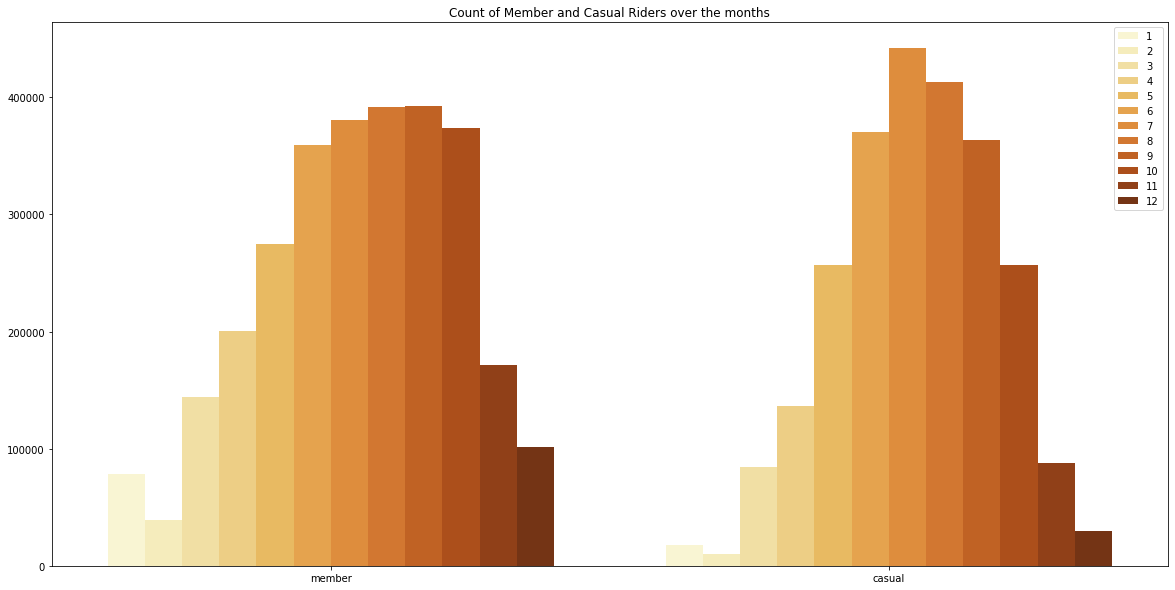

In [ ]:
# Plot count of Member and Casual Riders over the months
plt.figure(figsize = (20,10))
sns.barplot(val,cbm, hue = months,palette="YlOrBr").set(title="Count of Member and Casual Riders over the months")


In [ ]:
customer_by_ride = cyclistic.groupby("member_casual")["rideable_type"].value_counts()
rides = []
val = []
cmr = list(customer_by_ride.values)
for i, j in customer_by_ride.index:
  val.append(j)
  rides.append(str(i))

[Text(0.5, 1.0, 'Count of Member and Casual Riders over the months')]

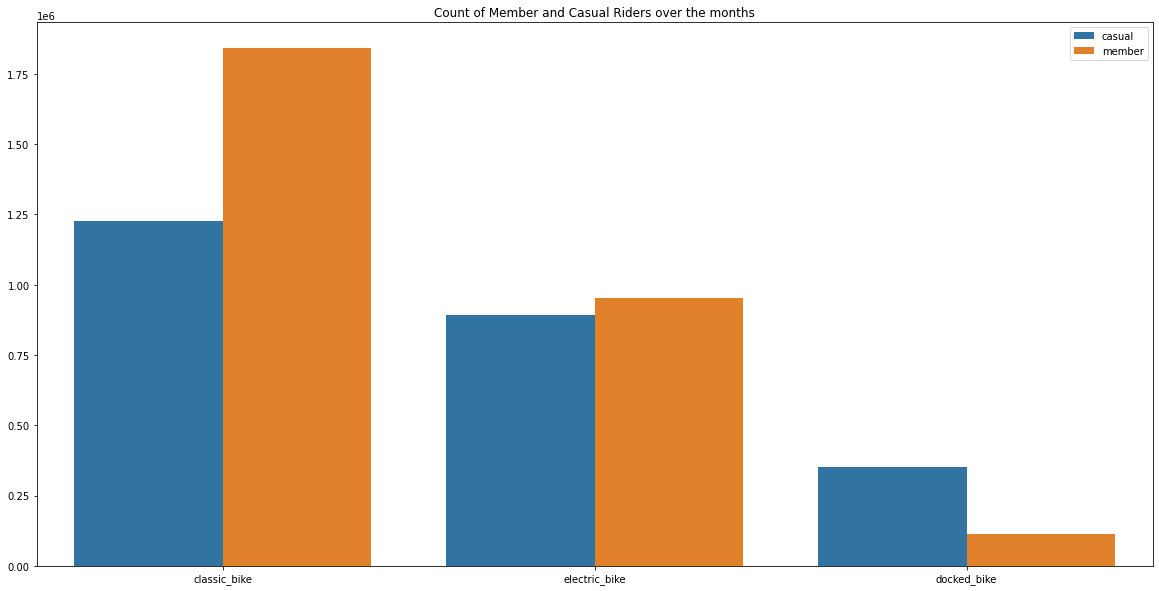

In [ ]:
plt.figure(figsize = (20,10))

sns.barplot(val,cmr,hue = rides).set(title="Count of Member and Casual Riders over the months")